In [1]:
import time
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import hcipy
from hcipy import *
import pickle
from astropy.io import fits
print(fits)

import os, sys
os.chdir("/Users/mayragutierrez/keckAOSim/keckSim")
sys.path.insert(0, os.path.join(os.getcwd(), "simulations_codes"))
os.environ["OOPAO_PATH"]="/Users/mayragutierrez/OOPAO"
sys.path.insert(0, "/Users/mayragutierrez/OOPAO")
#sys.path.insert(0, os.getcwd())

from OOPAO.calibration.getFittingError import *
from OOPAO.calibration.CalibrationVault import CalibrationVault
from OOPAO.OPD_map import OPD_map
from OOPAO.calibration.compute_KL_modal_basis import compute_KL_basis
from scipy.ndimage import center_of_mass
from scipy.optimize import curve_fit

import importlib
from KAO_parameter_file import initializeParameterFile
from initialize_AO import initialize_AO_hardware

<module 'astropy.io.fits' from '/opt/anaconda3/envs/oopao/lib/python3.9/site-packages/astropy/io/fits/__init__.py'>


     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             




OOPAO Warning: 
User-defined pupil, the central obstruction will not be taken into account...

------------ Telescope -------------
Diameter [m]             |  10.93   
Resolution [px]          |   480    
Pixel size [m]           |   0.02   
Surface [m²]             |  71.63   
Central obstruction [%]  |    0     
Pixels in pupil          |  138152  
Field of view [arcsec]   |   0.00   
------------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 6.4e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  5.00   
Flux [photon/m²/s]       | 1.1e+08 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 2.2e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   in

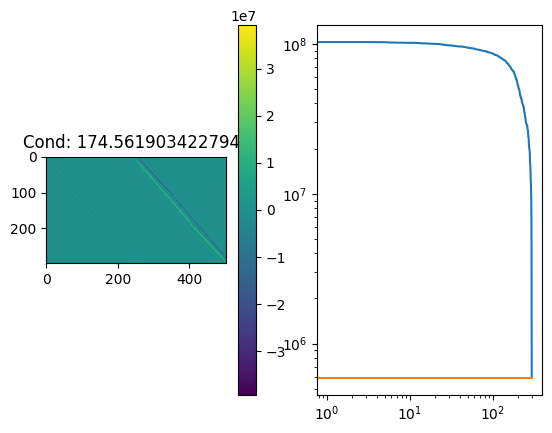

Everything has been loaded and the calibration are done!
Check that HCIPy and Zero Padded OOPA pupils are identical: True


/var/folders/g2/4by_wvp50hq5wxb7sgwwwmxm0000gn/T/ipykernel_91900/2588710049.py:98: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  aperture = evaluate_supersampled(circular_aperture(D*1.01), pupil_grid, 8)*np.reshape(zero_padded_OOPA_pupil, int(nPx**2))
/var/folders/g2/4by_wvp50hq5wxb7sgwwwmxm0000gn/T/ipykernel_91900/2588710049.py:110: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  pupil_outer = circular_aperture(pupil_diameter)(grid)
/var/folders/g2/4by_wvp50hq5wxb7sgwwwmxm0000gn/T/ipykernel_91900/2588710049.py:111: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  pupil_inner = circular_aperture(central_obscuration_diameter)(grid)


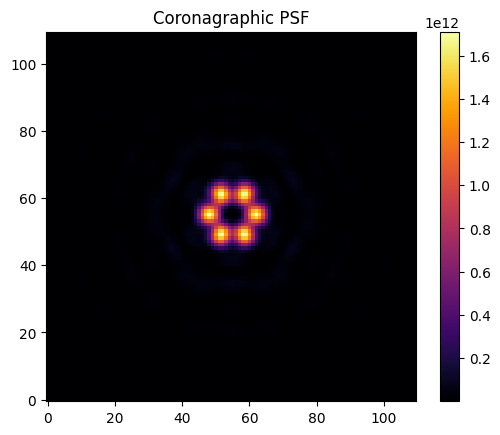

/var/folders/g2/4by_wvp50hq5wxb7sgwwwmxm0000gn/T/ipykernel_91900/2588710049.py:169: RuntimeWarning: invalid value encountered in power
  plt.figure(), plt.imshow(PSF_diff[size_psf-50:size_psf+50,size_psf-50:size_psf+50]**0.2), plt.colorbar(), plt.title('Diffraction limited PSF'), plt.show()


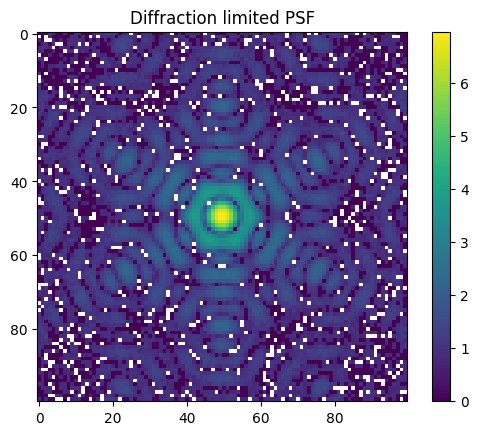

/var/folders/g2/4by_wvp50hq5wxb7sgwwwmxm0000gn/T/ipykernel_91900/2588710049.py:170: RuntimeWarning: invalid value encountered in power
  plt.figure(), plt.imshow(PSF_ncpa[size_psf-50:size_psf+50,size_psf-50:size_psf+50]**0.2), plt.colorbar(), plt.title('NCPA PSF'), plt.show()


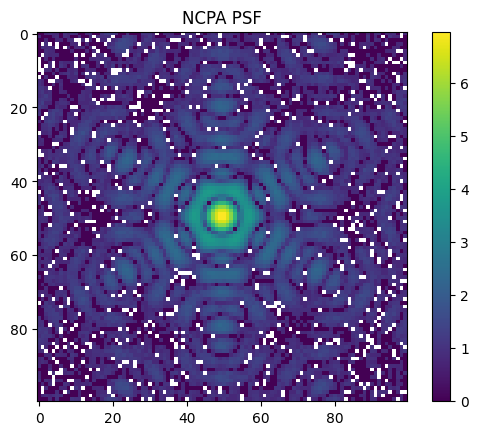

Re-initializing WFS...
Acquiring reference slopes..
Done!
Setting slopes units..
Done!
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% SHACK HARTMANN WFS %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    Subapertures            20        
  Subaperture Size         0.55              [m]        
     Pixel FoV             0.85            [arcsec]     
   Subapertue FoV          3.38            [arcsec]     
 Valid Subaperture         252        
   Binning Factor           1         
   Spot Sampling    0.2857142857142857    [pix/FWHM]    
   Geometric WFS          False       
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Flux updated, magnitude is  5 and flux is 1.09e+08
Flux updated, magnitude is  5 and flux is 1.90e+07


In [2]:
#%%
'''
import time
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from hcipy import *
from OOPAO.OPD_map import OPD_map
from OOPAO.calibration.getFittingError import *
from KeckTools import *
from astropy.io import fits
import pickle

from OOPAO.calibration.getFittingError import *
from OOPAO.calibration.CalibrationVault import CalibrationVault
from OOPAO.OPD_map import OPD_map
from scipy.ndimage import center_of_mass
from scipy.optimize import curve_fit

import os, sys
os.chdir("/Users/mayragutierrez/keckAOSim/keckSim")
sys.path.insert(0, os.path.join(os.getcwd(), "simulations_codes"))
os.environ["OOPAO_PATH"]="/Users/mayragutierrez/OOPAO"
sys.path.insert(0, "/Users/mayragutierrez/OOPAO")
#sys.path.insert(0, os.getcwd())
from KAO_parameter_file import initializeParameterFile
from initialize_AO import initialize_AO_hardware
'''
from multiprocessing import Process
import psutil
import random
from multiprocessing import Pool
from threadpoolctl import threadpool_limits

# %% -----------------------     Import system  ----------------------------------

param = initializeParameterFile()
KAO = initialize_AO_hardware(param)

# M1_opd = KAO.opd_M1.OPD
ncpa = KAO.opd_ncpa.OPD
jitter_x = KAO.jitter.x
# plot the OPD map
# plt.figure(), plt.imshow(KAO.opd_M1.OPD), plt.colorbar(), plt.title('M1 OPD'), plt.show()
# plt.figure(), plt.imshow(KAO.opd_ncpa.OPD), plt.colorbar(), plt.title('NCPA OPD'), plt.show()
# plt.figure(), plt.plot(jitter_x), plt.title('Jitter amplitude'), plt.show()

# plt.figure()
# plt.imshow(np.reshape(np.sum(KAO.dm.modes**5,axis=1),[KAO.tel.resolution,KAO.tel.resolution]).T +
#             KAO.tel.pupil,extent=[-KAO.tel.D/2,KAO.tel.D/2,-KAO.tel.D/2,KAO.tel.D/2])
# plt.plot(KAO.dm.coordinates[:,0],KAO.dm.coordinates[:,1],'rx')
# plt.xlabel('[m]')
# plt.ylabel('[m]')
# plt.title('DM Actuator Coordinates keck')
# plt.colorbar()
# plt.show()

# plt.figure(), plt.plot(KAO.calib_zonal.eigenValues,'rx'), plt.ylabel('eigenValues zonal'), plt.show()
# plt.figure(), plt.imshow(KAO.calib_zonal.D), plt.colorbar(), plt.title('Zonal Imat'), plt.show()

#%% Add co-phasing error
Nseg = param['numberSegments']
KAO.ksm.set_segment_actuators(np.arange(Nseg), 1,0,0)
flat_ksm = KAO.ksm.opd.shaped

for i in range(Nseg):
    aa = np.random.rand(3) # (piston in m, tip in rad, tilt in rad)
    KAO.ksm.set_segment_actuators(i, aa[0], aa[1]*0, aa[2]*0)

opd_phasing = KAO.ksm.opd.shaped # OPD
surf = KAO.ksm.surface.shaped # Surface of the DM it is the OPD divided by 2
cophase_amp = np.std(opd_phasing[np.where(flat_ksm != 0)])

seg_amp = 0*1e-9
default_shape = opd_phasing/cophase_amp * seg_amp
aa = np.std(default_shape[np.where(flat_ksm != 0)])

opd = pickle.load( open( '/Users/mayragutierrez/keckAOSim/keckSim/simulations_codes/OPD_120nm_file.pkl', "rb" ) )
KAO.tel.resetOPD()
KAO.ngs * KAO.tel * opd

#### Set up HCIPy pupil
nPx = param['resolution']*1.5
D = param['diameter']

pupil_grid = make_pupil_grid(nPx,D*1.5)

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value


OOPA_pupil = KAO.tel.pupil
zero_padded_OOPA_pupil = np.pad(OOPA_pupil, int((nPx-len(KAO.tel.pupil))/2), pad_with)

aperture = evaluate_supersampled(circular_aperture(D*1.01), pupil_grid, 8)*np.reshape(zero_padded_OOPA_pupil, int(nPx**2))

print('Check that HCIPy and Zero Padded OOPA pupils are identical:', np.array_equal(np.reshape(aperture, (int(nPx),int(nPx))),zero_padded_OOPA_pupil ))

#### Set up HCIPy coronagraph
## I need to rotate my Lyot mask by 45 degrees

def make_Keck_Lyot_mask(pupil_diameter, central_obscuration_ratio, num_spiders=0, spider_width=0.01):

    central_obscuration_diameter = pupil_diameter * central_obscuration_ratio

    def func(grid):
        pupil_outer = circular_aperture(pupil_diameter)(grid)
        pupil_inner = circular_aperture(central_obscuration_diameter)(grid)
        spiders = 1

        spider_angles = np.linspace(0, 2*np.pi, num_spiders, endpoint=False)+(np.pi/2)

        for angle in spider_angles:
            x = pupil_diameter * np.cos(angle)
            y = pupil_diameter * np.sin(angle)

            spiders *= make_spider((0, 0), (x, y), spider_width)(grid)

        return (pupil_outer - pupil_inner) * spiders
    return func

lyot_mask = evaluate_supersampled(make_Keck_Lyot_mask(8.720,(2.948/8.720),6,0.06673), pupil_grid, 4)
lyot_stop = Apodizer(lyot_mask)
coron=VortexCoronagraph(pupil_grid, charge=2)

# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.title('Aperture')
# imshow_field(aperture, cmap='gray')
# plt.subplot(1,2,2)
# plt.title('Lyot stop')
# imshow_field(lyot_mask, cmap='gray')
# plt.show()

#### Setup HCIPy science plane
wavelength_L = 3.776e-6 # M = 4.670e-6 #
wf_sci_L = Wavefront(aperture,wavelength=wavelength_L)

FOV_arcseconds = 2.2
pixel_sampling_arcseconds = 0.02 # 20mas
FOV_lD_L=FOV_arcseconds*(1.0/206265)/((wavelength_L)/D) # 2.2 arcseconds is 31 Lambda/D

focal_grid_sci_L = make_focal_grid(q=(FOV_arcseconds/pixel_sampling_arcseconds)/FOV_lD_L, 
                                   num_airy=FOV_lD_L/2,spatial_resolution=wavelength_L/D)
propagator_sci_L = FraunhoferPropagator(pupil_grid, focal_grid_sci_L)

#### Propagrate WF through the coronagraph
Inorm = propagator_sci_L.forward(wf_sci_L.copy()).power.max()
lyot_plane = coron(wf_sci_L.copy())
post_lyot_mask = lyot_stop(lyot_plane)
img = propagator_sci_L(post_lyot_mask).intensity
n = int(np.sqrt(img.size))
plt.figure(), plt.imshow(img.reshape(n, n), origin='lower', cmap='inferno'), plt.colorbar(), plt.title('Coronagraphic PSF'), plt.show()



# %% -----------------------     plot PSF  ----------------------------------

 #diff at the science wavelength
LD = KAO.science.wavelength/KAO.tel.D * 206265 * 1000 # in mas

PSF_diff = KAO.PSF_diff
PSF_ncpa = KAO.PSF_ncpa
size_psf = PSF_diff.shape[0]//2

plt.figure(), plt.imshow(PSF_diff[size_psf-50:size_psf+50,size_psf-50:size_psf+50]**0.2), plt.colorbar(), plt.title('Diffraction limited PSF'), plt.show()
plt.figure(), plt.imshow(PSF_ncpa[size_psf-50:size_psf+50,size_psf-50:size_psf+50]**0.2), plt.colorbar(), plt.title('NCPA PSF'), plt.show()


# %% -----------------------     AO loop  ----------------------------------

KAO.wfs.is_geometric = False
KAO.tel.isPaired = False
KAO.tel.resetOPD()
KAO.dm.coefs = 0
KAO.ttm.coefs = 0
KAO.ngs.magnitude = param['magnitude_guide']
KAO.science.magnitude = param['science_magnitude']

def run_loop(name):
    myseed = hash((os.getpid(), time.time()))% 2**32
    print('myseed = ', myseed)
    # Atmosphere propagation
    # KAO.opd_M1.OPD = M1_opd
    KAO.opd_ncpa.OPD = ncpa

    KAO.atm.generateNewPhaseScreen(myseed)
    KAO.tel+KAO.atm
    KAO.ngs * KAO.tel * opd
    KAO.tel * KAO.ttm * KAO.dm * KAO.wfs

    type = 'keck'
    M2C_CL = np.eye(KAO.dm.nValidAct)
    Rec = KAO.keck_reconstructor
    modes_proj = KAO.dm.modes
    proj = KAO.projector_dm

    TT_modes = KAO.ttm.modes
    ratio = int((1/KAO.tel.samplingTime)/(param['Jitter_freq']))
    opd_jitter = OPD_map(telescope=KAO.tel)

    # loop parameters
    gainCL = param['gainCL']
    gainTTM = gainCL
    latency = param['latency']
    nLoop = 100 #param['nLoop']

    KAO.wfs.cam.photonNoise = True # True to add photon noise only, to add RON add the line wfs.cam.readoutNoise = 0.5 for example
    if KAO.wfs.cam.photonNoise == True:
        KAO.wfs.cam.readoutNoise = param['ron']
        KAO.wfs.cam.darkCurrent = param['darkCurrent']

    # allocate memory to save data
    SR = np.zeros(nLoop)
    total = np.zeros(nLoop)
    residual = np.zeros(nLoop)
    residual_OPD = []
    fitting_rms = np.zeros(nLoop)
    wfsSignal = np.arange(0, KAO.wfs.nSignal) * 0
    signalBuffer = np.zeros((KAO.wfs.signal.shape[0], nLoop)) # buffer for the frame delay
    SRC_PSF = []

    L_psf = np.zeros((nLoop, 110,110)) 
    L_coro = np.zeros((nLoop, 110,110)) 
    try:
        for i in range(nLoop):
            a = time.time()
            KAO.atm.update()

            # Add Jitter
            if param['Jitter']:
                if i%ratio == 0 or i==0:
                    opd_jitter.OPD = (KAO.jitter.x[i+1] * TT_modes[:,0].reshape(param['resolution'],param['resolution'])  + KAO.jitter.y[i+1] * TT_modes[:,1].reshape(param['resolution'],param['resolution']))*1e-9
            else: 
                opd_jitter.OPD = np.zeros((param['resolution'],param['resolution']))
            
            # Add M1 phase, NCPA and jitter
            KAO.ngs * KAO.tel * KAO.opd_M1 * opd_jitter 
            total[i] = np.std(KAO.tel.OPD[np.where(KAO.tel.pupil > 0)]) * 1e9

            KAO.tel * KAO.ttm * KAO.dm * KAO.wfs

            # fitting
            OPD_fitting_2D, OPD_corr_2D, OPD_turb_2D = getFittingError(KAO.tel.OPD, proj, modes_proj, display=False)
            fitting_rms[i] = np.std(OPD_fitting_2D[np.where(KAO.tel.pupil > 0)]) * 1e9

            KAO.science * KAO.tel * KAO.opd_ncpa * KAO.science_detector 

            if i >= latency:
                command = np.matmul(Rec, signalBuffer[:, i-latency])
                KAO.dm.coefs = KAO.dm.coefs - gainCL * command[:KAO.dm.nValidAct]
                KAO.ttm.coefs = KAO.ttm.coefs - gainTTM * command[KAO.dm.nValidAct:]

            signalBuffer[:, i] = KAO.wfs.signal

            SR[i] = np.exp(-np.var(KAO.tel.src.phase[np.where(KAO.tel.pupil == 1)]))
            residual[i] = np.std(KAO.tel.OPD[np.where(KAO.tel.pupil > 0)]) * 1e9

            new_sci_wf = wf_sci_L.copy()
            zero_padded_OPD = np.reshape(np.pad(KAO.tel.mean_removed_OPD, int((nPx-len(KAO.tel.pupil))/2), pad_with), len(new_sci_wf.electric_field))
            new_sci_wf.electric_field*=np.exp(1j * zero_padded_OPD * (2*np.pi)/wavelength_L)
            
            
            L_psf_temp = propagator_sci_L(new_sci_wf).intensity
            L_psf[i,:,:] = np.reshape(L_psf_temp, (int(np.sqrt(np.shape(L_psf_temp))),int(np.sqrt(np.shape(L_psf_temp)))))

            new_sci_wf = wf_sci_L.copy()
            zero_padded_OPD = np.reshape(np.pad(KAO.tel.mean_removed_OPD, int((nPx-len(KAO.tel.pupil))/2), pad_with), len(new_sci_wf.electric_field))
            new_sci_wf.electric_field*=np.exp(1j * zero_padded_OPD * (2*np.pi)/wavelength_L)
            
            lyot_plane_L = coron(new_sci_wf) # vortex
            wf_coron_L = propagator_sci_L.forward(lyot_stop(lyot_plane_L)) # Lyot stop, back to focal plane
            L_coro_temp = wf_coron_L.intensity
            L_coro[i,:,:] = np.reshape(L_coro_temp, (int(np.sqrt(np.shape(L_coro_temp))),int(np.sqrt(np.shape(L_coro_temp)))))        


            # if i%10 == 0:
            #     res = KAO.tel.OPD
            #     res = (res - np.mean(res[np.where(KAO.tel.pupil>0)]))*KAO.tel.pupil
            #     plt.figure(), plt.imshow(res), plt.colorbar(), plt.title('Residual OPD'), plt.show()
            #     residual_OPD.append(res)
            #     time.sleep(1)

            # if i>50:
            #     SRC_PSF.append(KAO.science_detector.frame)
            if name==0:
                print('Loop' + str(i) + '/' + str(nLoop) + ' Turbulence: ' + str(total[i]) + ' -- Residual:' +
                    str(residual[i]) + ' -- Fitting:' + str(fitting_rms[i]) + ' -- '+ str(SR[i])+'\n')
        return(L_psf, L_coro)
    finally:
        print('Average SR = %d\n', np.mean(SR[50:]*100))

        plt.close()
        mytime = str(time.time()).replace('.', '')

        hdu = fits.PrimaryHDU(np.sum(L_coro, axis=0))
        hdul = fits.HDUList([hdu])
        hdul.writeto('/data/rjensenc/OOPAO/L_haka_coro_120nm_mag12p5_'+mytime+'_20s_sum.fits', overwrite=True)

        hdu = fits.PrimaryHDU(np.sum(L_psf, axis=0))
        hdul = fits.HDUList([hdu])
        hdul.writeto('/data/rjensenc/OOPAO/L_haka_psf_120nm_mag12p5_'+mytime+'_20s_sum.fits', overwrite=True)

        np.save('/data/rjensenc/OOPAO/strehl_K_haka_120nm_mag12p5_'+mytime+'_20s.npy',np.array(SR))


def run_loop_single_threaded(x):
    with threadpool_limits(limits=1):
        run_loop(x)

#N = 22
#with Pool(N) as p:
#    p.map(run_loop_single_threaded, range(N))

In [3]:
def run_loop(name):
    myseed = hash((os.getpid(), time.time()))% 2**32
    print('myseed = ', myseed)
    # Atmosphere propagation
    # KAO.opd_M1.OPD = M1_opd
    KAO.opd_ncpa.OPD = ncpa

    KAO.atm.generateNewPhaseScreen(myseed)
    KAO.tel+KAO.atm
    KAO.ngs * KAO.tel * opd
    KAO.tel * KAO.ttm * KAO.dm * KAO.wfs

    type = 'keck'
    M2C_CL = np.eye(KAO.dm.nValidAct)
    Rec = KAO.keck_reconstructor
    modes_proj = KAO.dm.modes
    proj = KAO.projector_dm

    TT_modes = KAO.ttm.modes
    ratio = int((1/KAO.tel.samplingTime)/(param['Jitter_freq']))
    opd_jitter = OPD_map(telescope=KAO.tel)

    # loop parameters
    gainCL = param['gainCL']
    gainTTM = gainCL
    latency = param['latency']
    nLoop = 100 #param['nLoop']

    KAO.wfs.cam.photonNoise = True # True to add photon noise only, to add RON add the line wfs.cam.readoutNoise = 0.5 for example
    if KAO.wfs.cam.photonNoise == True:
        KAO.wfs.cam.readoutNoise = param['ron']
        KAO.wfs.cam.darkCurrent = param['darkCurrent']

    # allocate memory to save data
    SR = np.zeros(nLoop)
    total = np.zeros(nLoop)
    residual = np.zeros(nLoop)
    residual_OPD = []
    fitting_rms = np.zeros(nLoop)
    wfsSignal = np.arange(0, KAO.wfs.nSignal) * 0
    signalBuffer = np.zeros((KAO.wfs.signal.shape[0], nLoop)) # buffer for the frame delay
    SRC_PSF = []

    L_psf = np.zeros((nLoop, 110,110)) 
    L_coro = np.zeros((nLoop, 110,110)) 
    try:
        for i in range(nLoop):
            a = time.time()
            KAO.atm.update()

            # Add Jitter
            if param['Jitter']:
                if i%ratio == 0 or i==0:
                    opd_jitter.OPD = (KAO.jitter.x[i+1] * TT_modes[:,0].reshape(param['resolution'],param['resolution'])  + KAO.jitter.y[i+1] * TT_modes[:,1].reshape(param['resolution'],param['resolution']))*1e-9
            else: 
                opd_jitter.OPD = np.zeros((param['resolution'],param['resolution']))
            
            # Add M1 phase, NCPA and jitter
            KAO.ngs * KAO.tel * KAO.opd_M1 * opd_jitter 
            total[i] = np.std(KAO.tel.OPD[np.where(KAO.tel.pupil > 0)]) * 1e9

            KAO.tel * KAO.ttm * KAO.dm * KAO.wfs

            # fitting
            OPD_fitting_2D, OPD_corr_2D, OPD_turb_2D = getFittingError(KAO.tel.OPD, proj, modes_proj, display=False)
            fitting_rms[i] = np.std(OPD_fitting_2D[np.where(KAO.tel.pupil > 0)]) * 1e9

            KAO.science * KAO.tel * KAO.opd_ncpa * KAO.science_detector 

            if i >= latency:
                command = np.matmul(Rec, signalBuffer[:, i-latency])
                KAO.dm.coefs = KAO.dm.coefs - gainCL * command[:KAO.dm.nValidAct]
                KAO.ttm.coefs = KAO.ttm.coefs - gainTTM * command[KAO.dm.nValidAct:]

            signalBuffer[:, i] = KAO.wfs.signal

            SR[i] = np.exp(-np.var(KAO.tel.src.phase[np.where(KAO.tel.pupil == 1)]))
            residual[i] = np.std(KAO.tel.OPD[np.where(KAO.tel.pupil > 0)]) * 1e9

            new_sci_wf = wf_sci_L.copy()
            zero_padded_OPD = np.reshape(np.pad(KAO.tel.mean_removed_OPD, int((nPx-len(KAO.tel.pupil))/2), pad_with), len(new_sci_wf.electric_field))
            new_sci_wf.electric_field*=np.exp(1j * zero_padded_OPD * (2*np.pi)/wavelength_L)
            
            
            L_psf_temp = propagator_sci_L(new_sci_wf).intensity
            L_psf[i,:,:] = np.reshape(L_psf_temp, (int(np.sqrt(np.shape(L_psf_temp))),int(np.sqrt(np.shape(L_psf_temp)))))

            new_sci_wf = wf_sci_L.copy()
            zero_padded_OPD = np.reshape(np.pad(KAO.tel.mean_removed_OPD, int((nPx-len(KAO.tel.pupil))/2), pad_with), len(new_sci_wf.electric_field))
            new_sci_wf.electric_field*=np.exp(1j * zero_padded_OPD * (2*np.pi)/wavelength_L)
            
            lyot_plane_L = coron(new_sci_wf) # vortex
            wf_coron_L = propagator_sci_L.forward(lyot_stop(lyot_plane_L)) # Lyot stop, back to focal plane
            L_coro_temp = wf_coron_L.intensity
            L_coro[i,:,:] = np.reshape(L_coro_temp, (int(np.sqrt(np.shape(L_coro_temp))),int(np.sqrt(np.shape(L_coro_temp)))))        


            # if i%10 == 0:
            #     res = KAO.tel.OPD
            #     res = (res - np.mean(res[np.where(KAO.tel.pupil>0)]))*KAO.tel.pupil
            #     plt.figure(), plt.imshow(res), plt.colorbar(), plt.title('Residual OPD'), plt.show()
            #     residual_OPD.append(res)
            #     time.sleep(1)

            # if i>50:
            #     SRC_PSF.append(KAO.science_detector.frame)
            if name==0:
                print('Loop' + str(i) + '/' + str(nLoop) + ' Turbulence: ' + str(total[i]) + ' -- Residual:' +
                    str(residual[i]) + ' -- Fitting:' + str(fitting_rms[i]) + ' -- '+ str(SR[i])+'\n')
        return(L_psf, L_coro)
    finally:
        print('Average SR = %d\n', np.mean(SR[50:]*100))
        '''
        plt.close()
        mytime = str(time.time()).replace('.', '')

        hdu = fits.PrimaryHDU(np.sum(L_coro, axis=0))
        hdul = fits.HDUList([hdu])
        hdul.writeto('/data/rjensenc/OOPAO/L_haka_coro_120nm_mag12p5_'+mytime+'_20s_sum.fits', overwrite=True)

        hdu = fits.PrimaryHDU(np.sum(L_psf, axis=0))
        hdul = fits.HDUList([hdu])
        hdul.writeto('/data/rjensenc/OOPAO/L_haka_psf_120nm_mag12p5_'+mytime+'_20s_sum.fits', overwrite=True)

        np.save('/data/rjensenc/OOPAO/strehl_K_haka_120nm_mag12p5_'+mytime+'_20s.npy',np.array(SR))
        '''

In [4]:
L_psf, L_coro = run_loop(0)

myseed =  4207674504
Telescope and Atmosphere combined!


/var/folders/g2/4by_wvp50hq5wxb7sgwwwmxm0000gn/T/ipykernel_91900/1090826246.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  L_psf[i,:,:] = np.reshape(L_psf_temp, (int(np.sqrt(np.shape(L_psf_temp))),int(np.sqrt(np.shape(L_psf_temp)))))
/var/folders/g2/4by_wvp50hq5wxb7sgwwwmxm0000gn/T/ipykernel_91900/1090826246.py:95: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  L_coro[i,:,:] = np.reshape(L_coro_temp, (int(np.sqrt(np.shape(L_coro_temp))),int(np.sqrt(np.shape(L_coro_temp)))))


Loop0/100 Turbulence: 805.3239247333478 -- Residual:805.3239247333478 -- Fitting:134.29248335964178 -- 0.004550790286052647

Loop1/100 Turbulence: 805.6027352218088 -- Residual:805.6027352218088 -- Fitting:134.22079277302404 -- 0.004533827144150387

Loop2/100 Turbulence: 805.9331051223315 -- Residual:702.4105843253676 -- Fitting:134.2493113914919 -- 0.016534609313185806

Loop3/100 Turbulence: 806.2813576368816 -- Residual:614.9702115848411 -- Fitting:134.2487305789779 -- 0.04308788999626949

Loop4/100 Turbulence: 806.6318330682466 -- Residual:552.853478134389 -- Fitting:134.1007280593647 -- 0.07875959296036836

Loop5/100 Turbulence: 807.0153066625245 -- Residual:509.14754802567336 -- Fitting:133.96742224366662 -- 0.11585412985474487

Loop6/100 Turbulence: 807.4597619652457 -- Residual:476.35662316136666 -- Fitting:133.9852115055748 -- 0.15156666366215324

Loop7/100 Turbulence: 807.9346629898491 -- Residual:449.8916006917221 -- Fitting:133.93033538549167 -- 0.18583230419921257

Loop8/10

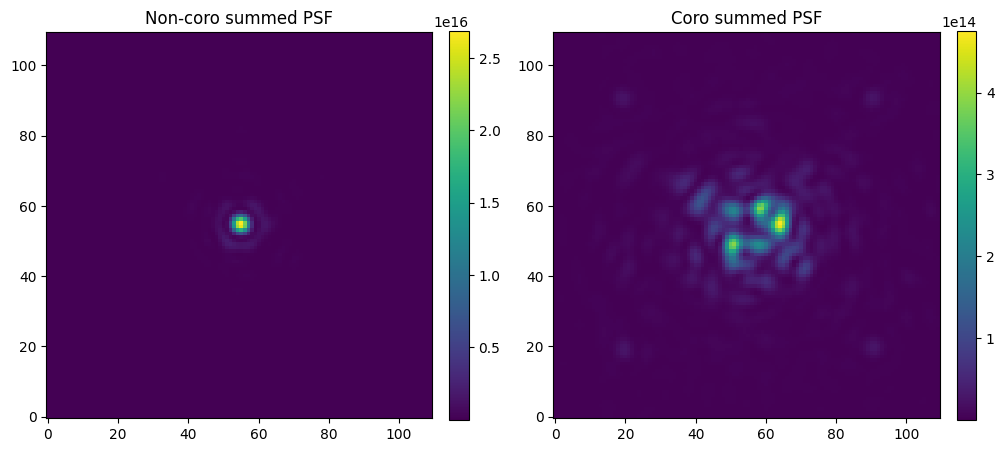

In [5]:
psf_sum = np.sum(L_psf, axis=0)
coro_sum = np.sum(L_coro, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(12,6))
im1=axes[0].imshow(psf_sum, origin="lower", cmap="viridis")
axes[0].set_title("Non-coro summed PSF")
fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
im2 = axes[1].imshow(coro_sum, origin="lower", cmap="viridis")
axes[1].set_title("Coro summed PSF")
fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
plt.show()